In [6]:
import pandas as pd

import yfinance as yf
from datetime import date

# get daily price TS from yahoo fin 
start_time = date.fromisoformat('2020-01-01')
end_time = date.fromisoformat('2020-12-31')

# 1.1 Importing gold ETF prices (GLD) for 2020
gld_df = yf.download('GLD', start_time, end_time, auto_adjust=True)
gld_series = gld_df[['Close']]

# 1.2 Importing equity ETF prices (MCHI) for 2020
mchi_df = yf.download('MCHI', start_time, end_time, auto_adjust=True)
mchi_series = mchi_df[['Close']]

# 1.2 Importing BTC-USD exch rate for 2020
import pandas_datareader as pdr
btc_series = pdr.get_data_yahoo(['BTC-USD'], 
                          start=start_time, 
                          end=end_time)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
# 2.1 Compute the daily returns of your Gold ETF, your Equity ETF, and bitcoin of April 2020 through Dec 2020
gld_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # Gold ETF (GLD) daily returns

In [3]:
mchi_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # MCHI daily returns

In [5]:
btc_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # BTC-USD daily returns

In [11]:
# 3.1 Compute the returns for each series.   
gld_returns = gld_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # Gold ETF (GLD) daily returns
mchi_returns = mchi_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # Gold ETF (GLD) daily returns
btc_returns = btc_series['2020-04-01':'2020-12-31'].pct_change().fillna(0) # BTC-USD daily returns

In [13]:
# 3.2 Similarly, compute the kurtosis for each series.
gld_returns.kurtosis()

Close    3.982892
dtype: float64

In [14]:
mchi_returns.kurtosis()

Close    2.140012
dtype: float64

In [15]:
btc_returns.kurtosis()

Symbols
BTC-USD    2.852824
dtype: float64

<AxesSubplot:ylabel='Frequency'>

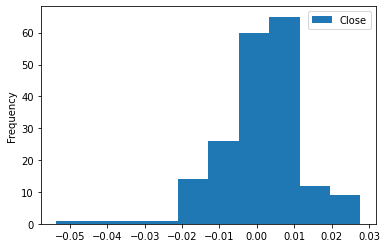

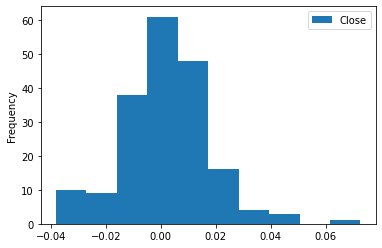

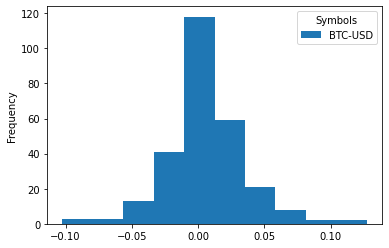

In [34]:
# 3.3 Use a common metric (BUT NOT 2 SIGMA), or derive your own, to identify an extreme value.  Explain your reasoning.
# We select using the 97.5th/2.5th percentile to determine outlier values. The following lines of code selects values greater than or equal to the 97.5 percentile or less or equal to the 0.025 percentile, for each return series.

# The following plots show the distribution of points for each return series.
gld_returns.plot.hist()
mchi_returns.plot.hist()
btc_returns.plot.hist()

In [42]:
# 3.4 Apply your metric to each of the return series.
gld_returns[gld_returns.ge(gld_returns.quantile(0.975))['Close']==True]
gld_returns[gld_returns.lt(gld_returns.quantile(0.025))['Close']==True]

,Close
Date,
2020-06-05,-0.020275
2020-08-11,-0.053694
2020-08-19,-0.031565
2020-09-23,-0.021606
2020-11-09,-0.044271


In [44]:
mchi_returns[mchi_returns.ge(mchi_returns.quantile(0.975))['Close']==True]
mchi_returns[mchi_returns.lt(mchi_returns.quantile(0.025))['Close']==True]

,Close
Date,
2020-05-01,-0.038179
2020-05-22,-0.037001
2020-06-11,-0.037837
2020-08-07,-0.032629
2020-11-10,-0.033029


In [43]:
btc_returns[btc_returns.ge(btc_returns.quantile(0.975))['BTC-USD']==True]
btc_returns[btc_returns.lt(btc_returns.quantile(0.025))['BTC-USD']==True]

Symbols,BTC-USD
Date,
2020-04-09,-0.059791
2020-05-09,-0.087292
2020-06-01,-0.062698
2020-06-10,-0.055553
2020-08-01,-0.060034
2020-09-02,-0.102395
2020-11-26,-0.084427


In [36]:
# 4.1 Pick 2 of the series  that had the most extreme values.

# Choose MCHI and BTC since they both showed some extreme moves to the donwside/upside at various points.

<AxesSubplot:xlabel='Close', ylabel='BTC-USD'>

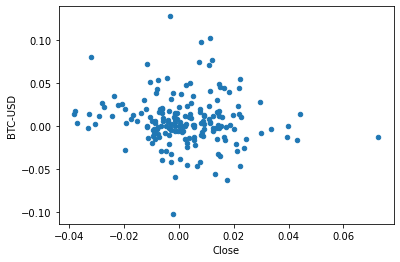

In [57]:
# 4.3 Graph the returns of those 2 series on an x-y plot.  Feel free to use either an individual quarter, or several quarters.
import matplotlib.pyplot as plt

merged_df = mchi_returns.merge(btc_returns, left_index=True, right_index=True)

merged_df.plot.scatter(x='Close', y='BTC-USD')

In [180]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime, timedelta
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA, ARMA

hist_training = mchi_returns['2020-04-01':'2020-06-30']
hist_testing = mchi_returns['2020-07-01':'2020-09-30']

dict_aic = {}
for i in range(5):
    for j in range(4):
        try:
            model = ARIMA(hist_training, order=(i, 0, j))
            model_fit = model.fit(disp=4)
            dict_aic[(i, j)] = model_fit.aic
        except:
            pass
df_aic = pd.DataFrame.from_dict(dict_aic, orient='index', columns=['aic'])
i, j = df_aic[df_aic.aic == df_aic.aic.min()].index[0]
print(f'ARIMA order is ({i}, {0}, {j})')


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequenc

In [183]:
model = ARIMA(hist_training, order=(i, 0, j))
arima_fitted = model.fit(disp=4)
arima_fitted.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                   63
Model:                     ARMA(4, 1)   Log Likelihood                 176.535
Method:                       css-mle   S.D. of innovations              0.014
Date:                Tue, 09 Feb 2021   AIC                           -339.070
Time:                        10:55:08   BIC                           -324.068
Sample:                             0   HQIC                          -333.170
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0025      0.000     11.456      0.000       0.002       0.003
ar.L1.Close     0.6639      0.122      5.448      0.000       0.425       0.903
ar.L2.Close     0.1241      0.149      0.833      0.405      -0.168       0.416
ar.L3.Close    -0.0091      0.150     -0.060      0.952      -0.304       0.286
ar.L4.Close    -0.2243      0.126     -1.785      0.074      -0.470       0.022
ma.L1.Close    -0.9999      0.057    -17.574      0.000      -1.111      -0.888
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1070           -0.5578j            1.2396           -0.0743
AR.2            1.1070           +0.5578j            1.2396            0.0743
AR.3           -1.1273           -1.2771j            1.7035           -0.3651
AR.4           -1.1273           +1.2771j            1.7035            0.3651
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [195]:

# The fit is on return. Errors are accumulated by cumprod
return_predicted = arima_fitted.predict()
price_predicted = mchi_df['Close']['2020-07-01':'2020-09-30']*np.cumprod(1+return_predicted/100)


In [196]:
return_predicted

Date
2020-04-01    0.002513
2020-04-02    0.002866
2020-04-03   -0.001342
2020-04-06    0.004732
2020-04-07   -0.002107
                ...   
2020-06-24   -0.007283
2020-06-25   -0.001144
2020-06-26   -0.003196
2020-06-29   -0.003343
2020-06-30   -0.000846
Length: 63, dtype: float64

In [198]:
forecasted, forecasted_std, forecasted_bounds = arima_fitted.forecast(hist_testing.shape[0])


In [199]:
return_expected = pd.DataFrame(forecasted, index=hist_testing.index)

In [201]:
return_expected

,0
Date,
2020-07-01,0.001728
2020-07-02,0.003638
2020-07-06,0.003834
2020-07-07,0.004511
2020-07-08,0.004169
...,...
2020-09-24,0.002513
2020-09-25,0.002513
2020-09-28,0.002513


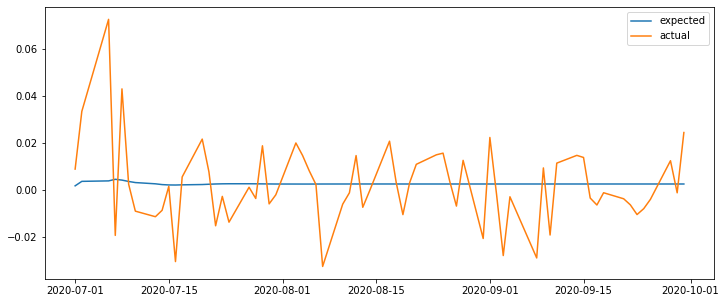

In [200]:
plt.figure(figsize=(12, 5))

return_expected = pd.DataFrame(forecasted, index=hist_testing.index)
plt.plot(return_expected, label='expected')
plt.plot(hist_testing, label='actual')
plt.legend()
plt.show()

In [202]:
import mgarch

ModuleNotFoundError: No module named 'mgarch'

In [ ]:
from arch import arch_model
dict_aic = {}

for l in range(5):
    for p in range(1, 5):
        for q in range(1, 5):
            try:
                split_date = hist_ret.index[-45]
                model = arch_model(hist_ret, mean='ARX', lags=l, vol='Garch', p=p, o=0, q=q, dist='Normal')
                res = model.fit(last_obs=split_date)
                dict_aic[(l, p, q)] = res.aic
            except:
                pass

df_aic = pd.DataFrame.from_dict(dict_aic, orient='index', columns=['aic'])
l, p, q = df_aic[df_aic.aic == df_aic.aic.min()].index[0]
print(f'ARIMA-GARCH order is ({l}, {p}, {q})')